In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Open the existing ocean zarr-store
ocn = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr",
    storage_options={"token": "anon"},
)
ocn

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [25]:
ocn.lat.where(ocn.lat == 40, method="nearest").argmin("lat").item()

TypeError: DataWithCoords.where() got an unexpected keyword argument 'method'

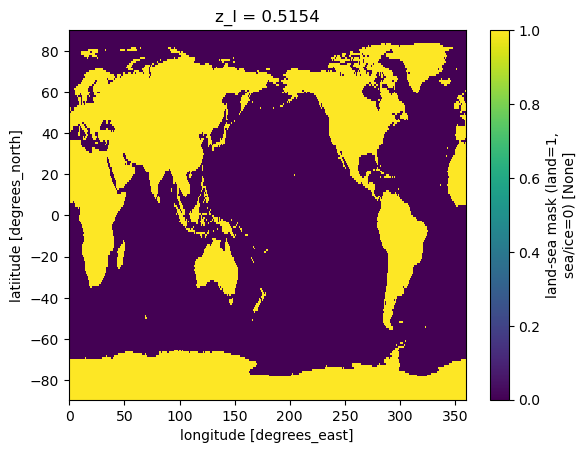

In [14]:
ocn.landsea_mask.isel(z_l=0).plot()
plt.show()

In [3]:
# Open the existing atm zarr-store
atm = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)
atm

<xarray.Dataset> Size: 60TB
Dimensions:        (time: 87020, grid_yt: 192, grid_xt: 384, pfull: 127)
Coordinates:
    cftime         (time) object 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
    ftime          (time) timedelta64[ns] 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
  * grid_xt        (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt        (grid_yt) float64 2kB 89.82 88.89 87.95 ... -88.18 -89.12
  * pfull          (pfull) float32 508B 0.01278 0.02033 0.03177 ... 996.2 998.8
  * time           (time) datetime64[ns] 696kB 1993-12-31T18:00:00 ... 2023-1...
Data variables: (12/182)
    acond          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    albdo_ave      (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...             ...
    xtts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xu             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xv             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xz             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xzts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    zc             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

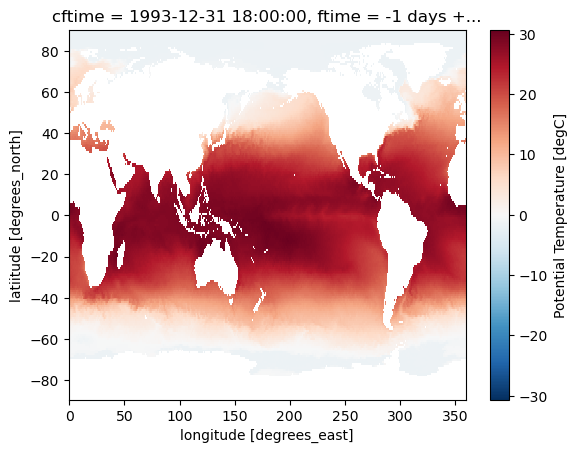

In [4]:
# Use temp to compute the mask: take a snapshot
temp_snapshot = ocn.temp.isel(time=0)
temp_snapshot.isel(z_l=0).plot()
plt.show()

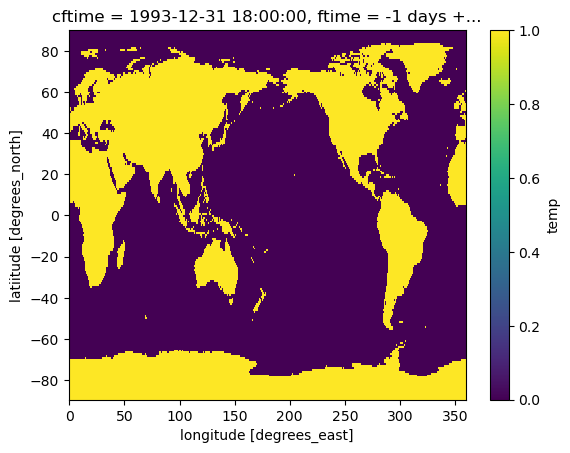

In [5]:
# compute the landsea_mask
landsea_mask = xr.where(np.isnan(temp_snapshot)==True, 1, 0).astype('int32')
landsea_mask.isel(z_l=0).plot()
plt.show()

In [6]:
# assign attributes to the mask
landsea_mask = landsea_mask.assign_attrs(long_name="land-sea mask (land=1, sea/ice=0)", units="None",)
# drop time coordinates
landsea_mask = landsea_mask.reset_coords(names=("cftime","ftime","time"), drop=True)

In [7]:
landsea_mask

<xarray.DataArray 'temp' (z_l: 75, lat: 192, lon: 384)> Size: 22MB
dask.array<astype, shape=(75, 192, 384), dtype=int32, chunksize=(75, 192, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 2kB 89.82 88.89 87.95 87.01 ... -87.25 -88.18 -89.12
  * lon      (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * z_l      (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Attributes:
    long_name:  land-sea mask (land=1, sea/ice=0)
    units:      None

In [8]:
# Encodings
# chunks
landsea_mask.encoding["chunks"] = landsea_mask.shape

# preferred_chunks
preferred_chunks = {key:value for key, value in zip(landsea_mask.dims, landsea_mask.shape)}
landsea_mask.encoding["preferred_chunks"] = preferred_chunks

In [9]:
landsea_mask.encoding

{'chunks': (75, 192, 384),
 'preferred_chunks': {'z_l': 75, 'lat': 192, 'lon': 384},
 'dtype': dtype('int32'),
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None}

In [10]:
# convert to dataset and copy the original global attributes
# Note: copying the global attributes of the original ocn dataset is necessary
# as xarray.to_zarr(mode="a") provides precedence to the new global attrs
# over the attrs of the dataset you are appending to. Here is a git issue on this:
# https://github.com/pydata/xarray/issues/8755

landsea_mask_ds = landsea_mask.to_dataset(name="landsea_mask",)
landsea_mask_ds.attrs = ocn.attrs.copy()

In [11]:
landsea_mask_ds

<xarray.Dataset> Size: 22MB
Dimensions:       (lat: 192, lon: 384, z_l: 75)
Coordinates:
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
Data variables:
    landsea_mask  (z_l, lat, lon) int32 22MB dask.array<chunksize=(75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [12]:
# Append to existing zarr stores
landsea_mask_ds.to_zarr("gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr", 
                        mode="a", consolidated=True,
                        storage_options={"token":"/location/to/replay-service-account.json"})